# Machine Learning Homework 02 – Linear Classifier Implementation

## Implementation

In [632]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import OneHotEncoder
import seaborn
import matplotlib.pyplot as plt

In [633]:
def linear_regression_train(x, y):
    x_pinv = np.linalg.pinv(x)
    weights = np.matmul(x_pinv, y)
    return weights

def linear_regression_predict(weights, x):
    weights = np.transpose(weights)
    y_hat = np.matmul(weights, x)
    return y_hat

In [634]:
def linear_classifier_train_reg_init(x):
    """
    x is a sklearn.utils.Bunch object – it contains a pandas dataframe, feature names, class names, and labels.
    """
    class_names = x.target_names
    class_names_indices_dict = dict(enumerate(list(x.target_names)))
    class_labels_numeric = list(x.target)
    # load dataframe object contained in x
    df = x.data
    # sample 80% of the dataframe
    x_sample = df.sample(frac=0.8)

In [644]:
coded_iris_labels = {'setosa': np.array([1,0,0]), 'versicolor': np.array([0,1,0]), 'virginica': np.array([0,0,1])}
#coded_iris_labels = {0: np.array([1,0,0]), 1: np.array([0,1,0]), 2: np.array([0,0,1])}

def multiclass_perceptron_train(x_train, y_train, num_iters=10000, regression_init=True):
    
    labels = set(y_train)
    df_by_label = []
    weights_by_label = []
    total = pd.concat([x_train, y_train], axis=1, sort=False)
    #x_array = x_train.to_numpy()
    # y_array = np.array([coded_iris_labels[x] for x in y_train.to_numpy()])
    #y_array = y_train.to_numpy()
    
    for x, y in total.groupby('species'):
        df_by_label.append(y)
        
        
    if regression_init:
        for i in range(len(labels)):
            xi_train = df_by_label[i].drop(columns='species')
            #df_by_label[i]['species'] = df_by_label[i]['species'].astype('category').cat.codes
            yi_train = df_by_label[i]['species']
            x_array = xi_train.to_numpy()
            #y_array = yi_train.to_numpy()
            y_array = np.array([coded_iris_labels[x] for x in yi_train.to_numpy()])
            #print(x_array.shape, y_array.shape)
            #print(y_array)
            weights_by_label.append(linear_regression_train(x_array, y_array))
        #weights = linear_regression_train(x_array, y_array)
        # print(x_train.to_numpy().shape)
        # print(np.array([coded_iris_labels[x] for x in y_train.to_numpy()]).reshape(-1,1).shape)
    else:
        #weights = np.array(x_train.to_numpy()[0])
        pass
    print(weights_by_label)

    predictions = []
    """
    #for i in range(len(y_train)):
        #y_hat = np.dot(x_array[i], weights.T)
        #y_predict = abs(int(round(y_hat)))
        #predictions.append(y_predict)
    """
    
    """
        print(y_predict)
        if y_predict != y_array[i]:
            if y_hat > y_array[i]:
                weights += (weights + x_array[i])
            else:
                weights -= (weights + x_array[i])
            #print(weights)
    """
        
    #print(df_by_label[0].to_numpy())
    
    #return (predictions, y_array, weights)
    
    #print(type(weights))


## Experiments

In [645]:
iris = load_iris(as_frame=True)
breast_cancer = load_breast_cancer(as_frame=True)

iris_array = load_iris(as_frame=True).data.to_numpy()
breast_cancer_array = load_breast_cancer(as_frame=True).data.to_numpy()

In [646]:
coded_iris_labels = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [647]:
# pandas dataframes
iris_df = seaborn.load_dataset('iris')
iris_features = iris_df.drop(columns='species')
iris_labels_str = iris_df['species']
iris_df['species'] = iris_df['species'].astype('category').cat.codes
iris_labels = iris_df['species']
print(iris_features)
print(iris_df)

# numpy arrays
#iris_np = iris_df.to_numpy()
#iris_features_np = iris_np[:,:-1]
#iris_labels_np = [coded_iris_labels[x] for x in iris_np[:,:-1]]

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3           

In [648]:
#iris_features

In [649]:
set(iris_labels)

{0, 1, 2}

In [650]:
#pd.get_dummies(iris_labels)

In [651]:
groups = []
for x, y in iris_seaborn.groupby('species'):
    groups.append(y)
#groups[0]
#list(iris_labels)

In [652]:
#prediction, y, weights = multiclass_perceptron_train(iris_features, iris_labels)
multiclass_perceptron_train(iris_features, iris_labels_str)


(50, 4) (50,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
(50, 4) (50,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
(50, 4) (50,)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
[array([0., 0., 0., 0.]), array([ 0.12292813,  0.10892321,  0.0223077 , -0.1004053 ]), array([0.10301933, 0.18508276, 0.08711182, 0.13501169])]


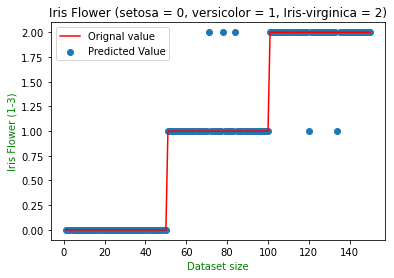

In [485]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (setosa = 0, versicolor = 1, Iris-virginica = 2)")

ax.legend()
plt.show()